In [10]:
import pandas as pd

# Upload the data from the CSV files
cash_requests_df = pd.read_csv('../cleaned_dataset/modified_cash_requests_data.csv')
fees_df = pd.read_csv('../cleaned_dataset/modified_fees_data.csv')

# Convert the columns to datetime
cash_requests_df['created_at'] = pd.to_datetime(cash_requests_df['created_at'], utc=True)
fees_df['created_at'] = pd.to_datetime(fees_df['created_at'], utc=True)

# Creat one column of cash_requests_df based on the first transaction for each user
cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_13695/508308714.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [11]:
# Join fees_df with cash_requests_df using 'cash_request_id' and 'id'
fees_df = fees_df.merge(cash_requests_df[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

In [12]:

# Filter the fees to exclude those with 'rejected' or 'cancelled' status
fees_df = fees_df[~fees_df['status'].isin(['rejected', 'cancelled'])]



In [13]:
# Calculate the income generated by each cohort
cohort_revenue = fees_df.groupby('cohort')['total_amount'].sum().reset_index()
cohort_revenue.columns = ['Cohorte', 'Ingresos Generados']

cohort_revenue.head(10)

,Cohorte,Ingresos Generados
0,2019-11,30.0
1,2019-12,1135.0
2,2020-01,460.0
3,2020-02,640.0
4,2020-03,650.0
5,2020-04,1585.0
6,2020-05,3950.0
7,2020-06,14470.0
8,2020-07,11200.0
9,2020-08,5050.0


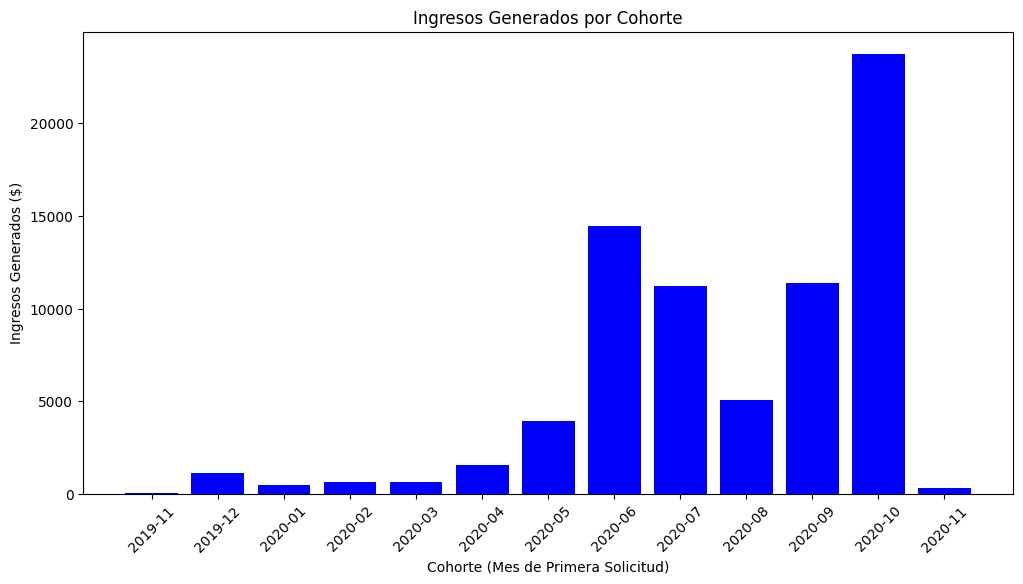

In [14]:
import matplotlib.pyplot as plt

# To plot the revenue for each cohort
plt.figure(figsize=(12, 6))
plt.bar(cohort_revenue['Cohorte'].astype(str), cohort_revenue['Ingresos Generados'], color='blue')
plt.xlabel('Cohorte (Mes de Primera Solicitud)')
plt.ylabel('Ingresos Generados ($)')
plt.title('Ingresos Generados por Cohorte')
plt.xticks(rotation=45)
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose 'created_at' is the date of the request creation and 'cohort' is the cohort based on this date
# Make sure 'created_at' and 'cohort' are in the correct format
fees_df['month'] = fees_df['created_at'].dt.to_period('M')

# Group by cohort and month to sum up the income
cohort_income_monthly = fees_df.groupby(['cohort', 'month'])['total_amount'].sum().reset_index()

# Pivot the data for the heatmap
pivot_income = cohort_income_monthly.pivot(index='cohort', columns='month', values='total_amount')


/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_13695/492713996.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_df['month'] = fees_df['created_at'].dt.to_period('M')


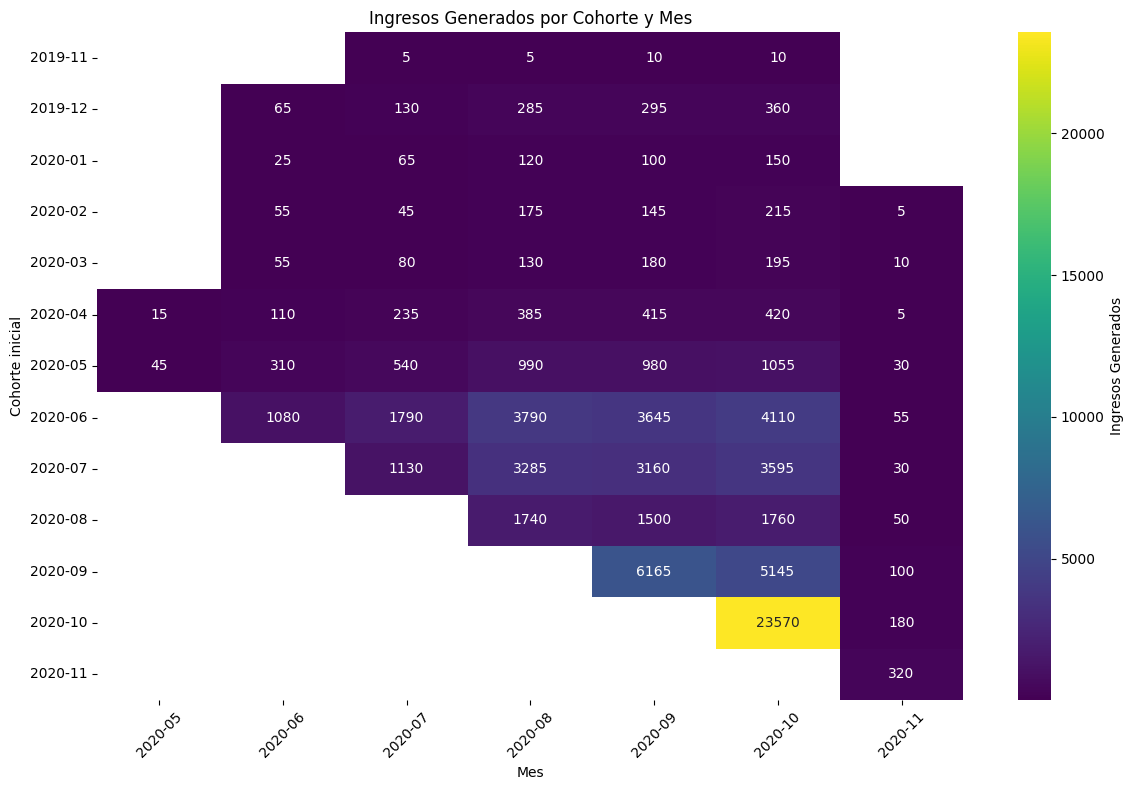

In [16]:
# Create the heatma
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_income, cmap='viridis', annot=True, fmt=".0f", cbar_kws={'label': 'Ingresos Generados'})
plt.title('Ingresos Generados por Cohorte y Mes')
plt.xlabel('Mes')
plt.ylabel('Cohorte inicial')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()